In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Loan_train (1).csv to Loan_train (1).csv


## Import Basic Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing and Print Head of dataset

In [ ]:
df = pd.read_csv('train.csv')
df.head() #First 5 rows of dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Print tail of dataset

In [ ]:
df.tail() #Last five rows of dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


## Dataset Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Dataset Shape

In [ ]:
df.shape

(614, 13)

## Dataset description

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Checking Null values

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##First we will fill the Missing Values in "LoanAmount" & "Credit_History" by the 'Mean' & 'Median' of the respective variables.This is called Impution Method

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

##Lets confirm there are any missing values in LoanAmount and Credit_History

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

##Now drop all other missing values of variables

In [ ]:
df.dropna(inplace=True)

##Lets check missing values for final time

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here, we have dropped all the missing values to avoid disturbances in the model. The Loan Prediction requires all the details to work efficiently and thus the missing values are dropped.

#**Exploratory Data Analysis**

### Comparing '**loan_status**' with Variables to see chances to get loan

Loan_Status    N    Y
Gender               
Female        33   65
Male         133  311


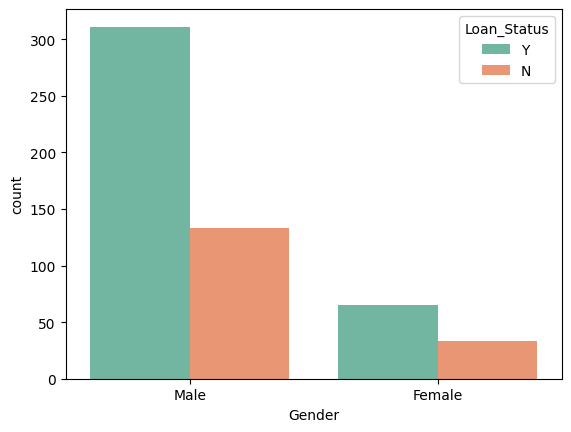

In [ ]:
crosstab_result = pd.crosstab(df['Gender'], df['Loan_Status'])
print(crosstab_result)

# Assuming df is your DataFrame
sns.countplot(x='Gender', hue='Loan_Status', data=df, palette='Set2')
plt.show()

Here we can see that **Male** have more chance to get loan


Loan_Status   N    Y
Married             
No           70  117
Yes          96  259


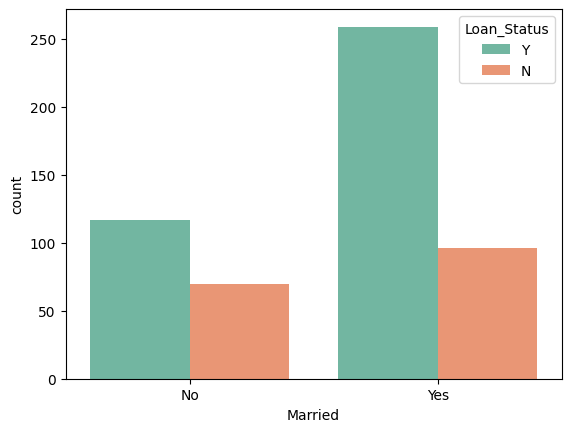

In [ ]:
# Assuming df is your DataFrame
crosstab_result = pd.crosstab(df['Married'], df['Loan_Status'])
print(crosstab_result)

# Assuming df is your DataFrame
sns.countplot(x='Married', hue='Loan_Status', data=df, palette='Set2')
plt.show()

Here we can see that **Married** person have more chance to get loan


Loan_Status     N    Y
Education             
Graduate      122  303
Not Graduate   44   73


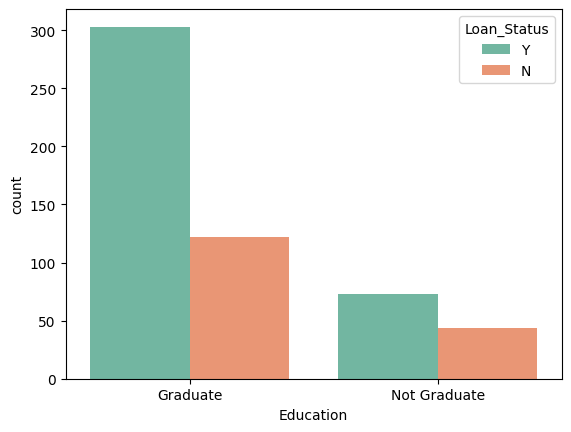

In [ ]:
# Assuming df is your DataFrame
crosstab_result = pd.crosstab(df['Education'], df['Loan_Status'])
print(crosstab_result)

# Assuming df is your DataFrame
sns.countplot(x='Education', hue='Loan_Status', data=df, palette='Set2')
plt.show()

Here we can see that **Graduate** person have more chance to get loan


Loan_Status      N    Y
Self_Employed          
No             141  326
Yes             25   50


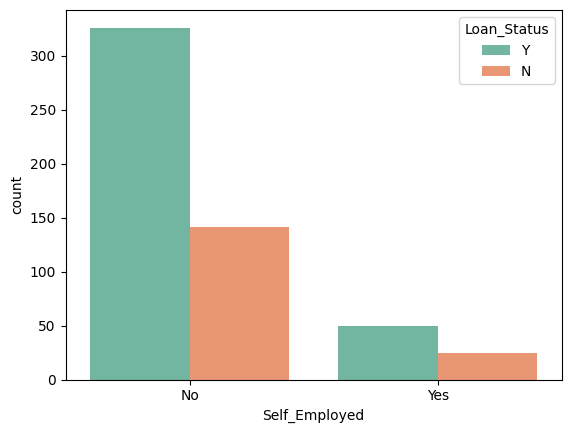

In [ ]:
# Assuming df is your DataFrame
crosstab_result = pd.crosstab(df['Self_Employed'], df['Loan_Status'])
print(crosstab_result)

# Assuming df is your DataFrame
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df, palette='Set2')
plt.show()

Here we can see that **Not Self Employed** person have more chance to get loan


Loan_Status      N    Y
Credit_History         
0.0             67    7
1.0             99  369


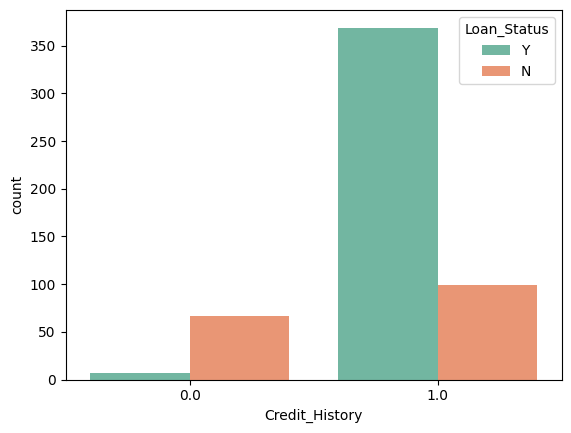

In [ ]:

# Assuming df is your DataFrame
crosstab_result = pd.crosstab(df['Credit_History'], df['Loan_Status'])
print(crosstab_result)

# Assuming df is your DataFrame
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette='Set2')
plt.show()

Here we can see that **Credit History** person have more chance to get loan


Loan_Status     N    Y
Property_Area         
Rural          61   98
Semiurban      47  162
Urban          58  116


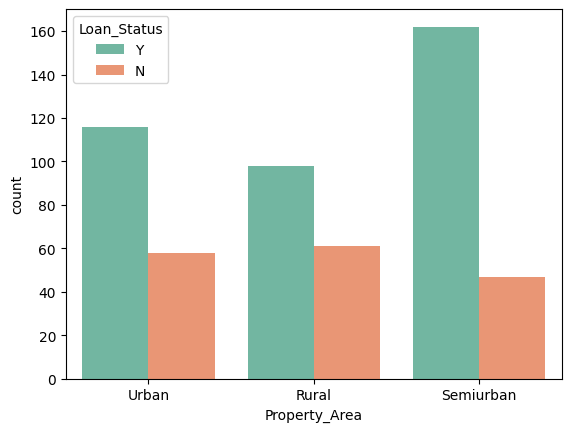

In [ ]:
# Assuming df is your DataFrame
crosstab_result = pd.crosstab(df['Property_Area'], df['Loan_Status'])
print(crosstab_result)

#For graph
sns.countplot(x='Property_Area', hue='Loan_Status', data=df, palette='Set2')
plt.show()

Here we can see that **Semi Urban** area have more chance to get loan


#**Now we converting categorical variables to numerical form**

In [ ]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [ ]:
df['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [ ]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()


1    444
0     98
Name: Gender, dtype: int64

In [ ]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [ ]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    309
1     94
2     94
3     45
Name: Dependents, dtype: int64

In [ ]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [ ]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [ ]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [ ]:
df['LoanAmount'].value_counts

<bound method IndexOpsMixin.value_counts of 0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 542, dtype: float64>

In [ ]:
df['Loan_Amount_Term'].value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
df['Credit_History'].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

# **Display the Correlation Matrix to see relationship b/w Variables**

<ipython-input-32-6b3040421177>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


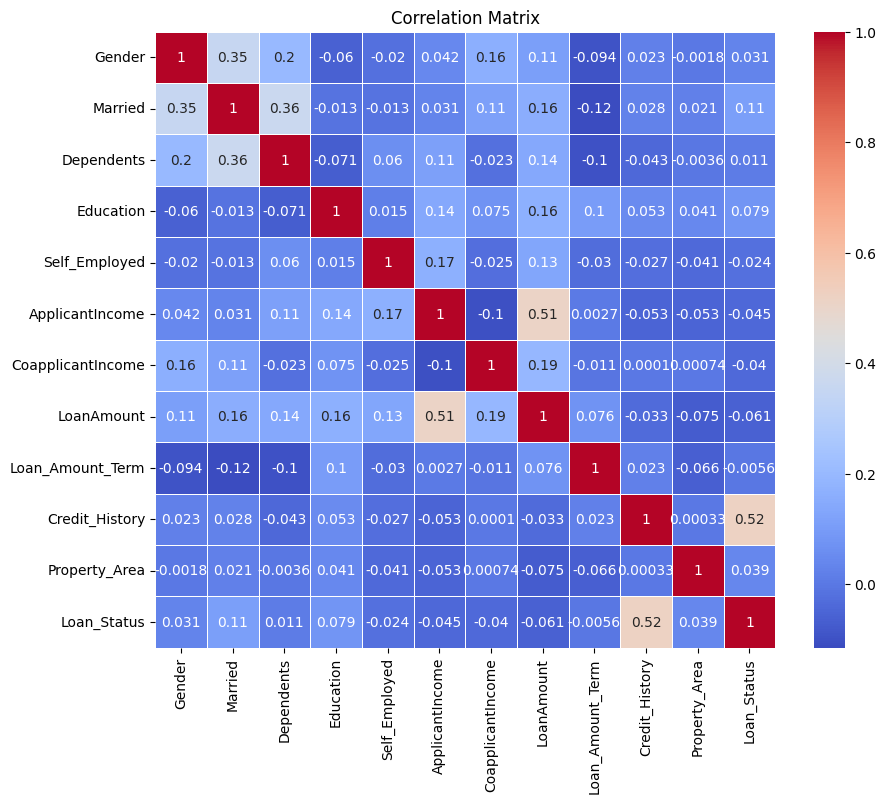

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**Credit_History** (Independent Variable) has the maximum correlation with **Loan_Status** (Dependent Variable)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


# **Importing Packages for Classification algorithms**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import tree

#**Splitting the data into Train and Test**

In [ ]:
X = df.iloc[1:542,1:12].values #for model trainging it convert into matrics or numpy arrays
y = df.iloc[1:542,12].values #this is for targeted variable which is 12 means 13('loan_status')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
print(X_train)

[[  1.   1.   0. ... 360.   1.   1.]
 [  0.   0.   0. ... 360.   0.   1.]
 [  1.   1.   1. ... 360.   1.   1.]
 ...
 [  0.   0.   0. ... 360.   0.   2.]
 [  1.   1.   0. ... 360.   1.   0.]
 [  0.   0.   0. ... 360.   1.   1.]]


In [ ]:
print(X_test)

[[  0.   0.   1. ...  36.   1.   1.]
 [  1.   1.   1. ... 240.   1.   2.]
 [  1.   0.   0. ... 360.   1.   1.]
 ...
 [  1.   1.   2. ... 360.   0.   2.]
 [  1.   0.   0. ... 360.   1.   0.]
 [  1.   0.   0. ... 360.   1.   2.]]


In [ ]:
print(y_train)

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0
 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1
 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1
 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1
 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1
 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1]


In [ ]:
print(y_test)

[0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0
 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1]


# **Logistic Regression**

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.7889908256880734


# **Support Vector Machine (SVM)**

In [ ]:
model = svm.SVC()
model.fit(X_train,y_train)

svc_prediction = model.predict(X_test)
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction,y_test))

SVM accuracy =  0.7155963302752294


# **Decision Tree**

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
dt_prediction = model.predict(X_test)
print('Decision Tree accuracy = ', metrics.accuracy_score(dt_prediction,y_test))


Decision Tree accuracy =  0.6055045871559633


# **K-Nearest Neighbour (KNN)**

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
knn_prediction = model.predict(X_test)
print('KNN accuracy = ', metrics.accuracy_score(knn_prediction,y_test))

KNN accuracy =  0.6422018348623854


**CONCLUSION:**

The Loan Status is heavily dependent on the Credit History for Predictions.
The Logistic Regression algorithm gives us the maximum Accuracy (79% approx) compared to the other 3 Machine Learning Classification Algorithms.

1.  The Loan Status is heavily dependent on the Credit History for Predictions.
2.   The Logistic Regression algorithm gives us the maximum Accuracy (79% approx) compared to the other 3 Machine Learning Classification Algorithms.
